In [1]:
# project: p1
# submitter: hli623
# partner: none

In [ ]:
import pylint, pandas, matplotlib, os, json, subprocess, random, string, time
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from subprocess import check_output
from pandas import Series, DataFrame
matplotlib.rcParams["font.size"] = 16

In [3]:
# Q1: How many commits are in the repo?
output = check_output(["git", "log", "master"], cwd="repo")
str_output = str(output, encoding="utf-8")
commits = str_output.split("\n\n")
count = 0
for i in commits:
    if "commit" in i:
        count += 1     
count

8

In [4]:
# Q2: How many commits were there by each author?
author = {}
for i in commits:
    if "Author"in i:
        commit_line = i.split("Author: ")
        name = commit_line[1].split(" <")[0]
        if name not in author:
            dict1 = {name: 1}
            author.update(dict1)
        else:
            author[name] += 1
author

{'Steve': 3, 'Ada': 3, 'Linus': 2}

Text(0, 0.5, 'Commit Count')

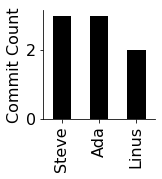

In [5]:
# Q3 [PLOT]: How many commits did each developer contribute?
def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax
ax = get_ax()
ax = pandas.Series(author).plot.bar(color="black", fontsize=16, figsize=(2, 2))
ax.set_ylabel("Commit Count", fontsize=16)

In [6]:
# Q4: How has the size of the wc.py code grown over time?
numbers = []
names = []
for i in range(15, -1, -1):
    if "commit" in commits[i]:
        num = commits[i].split("commit ")[1].split("\n")[0]
        numbers.append(num)
        name = commits[i].split("Author: ")[1].split("<")[0]
        names.append(name)
wc_size = []
for i in numbers:
    check_output(["git", "checkout", i], cwd="repo")
    with open(os.path.join(".", "repo", "wc.py"),"r") as f:
        lines = f.read().split("\n")
        wc_size.append(len(lines)-1)
wc_size

[21, 35, 35, 39, 40, 40, 40, 43]

Text(0, 0.5, 'Lines')

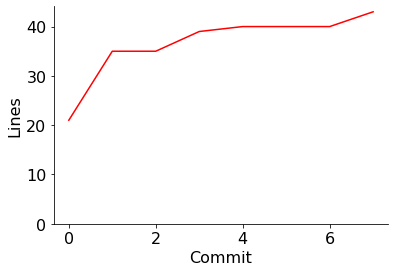

In [7]:
# Q5 [PLOT]: How has the size of the wc.py code grown over time?
x = list(range(0,7,2))
y = list(range(0, 41, 10))
ax = get_ax()
ax = pandas.Series(wc_size, index=list(range(0, len(wc_size)))).plot.line(color="red", fontsize=16)
plt.xticks(x)
plt.yticks(y)
ax.set_xlabel("Commit", fontsize=16)
ax.set_ylabel("Lines", fontsize=16)

In [8]:
def run_wc(body, commit= "master"):
    try:
        check_output(["git", "checkout", commit], cwd="repo")
        with open(os.path.join("repo", "test.txt"), "w") as f:
            f.write(body)
        output = check_output(["python3", "wc.py", "test.txt", "ALL"], cwd="repo", universal_newlines=True)
        return json.loads(output)
    except subprocess.CalledProcessError:
        return None
    
# test inputs to exercise wc.py
# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""
# expected result: 
test2 = """A B
A C
"""
# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [9]:
# Q6: What does run_wc(test1) return?
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [10]:
# Q7: What does run_wc(test3) return?
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [11]:
def test_table(body, expected):
    try:
        df = DataFrame()
        df["commit"] = numbers
        df["author"] = names
        pass_result = []
        for i in numbers:
            check_output(["git", "checkout", i], cwd="repo")
            output = run_wc(body, i)
            pass_result.append(output == expected)
        df["pass"] = pass_result
        return df
    except subprocess.CalledProcessError:
        return None

In [12]:
# Q8: What does test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [13]:
# Q9: What does test_table(test2, {'A': 2, 'B': 1, 'C': 1}) return?
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [14]:
# Q10: What does test_table(test3, {'A': 2, 'B': 1, 'C': 1}) return?
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


To get full points, write a short comment here about which of the three test inputs is most useful for evaluating the wc.py program.
- Test 3 is the most useful one because it contains both upper case and lower case.

In [15]:
def time_run_sec(uniq_words, total_words, word_size=6, commit = "master"):
    unique = []
    random_str = ""
    for i in range(uniq_words):
        unique.append("".join([random.choice(string.ascii_letters) for i in range(word_size)]))
    for i in range(total_words):
        random_str += random.choice(unique) + " "
    before = time.time()
    run_wc(random_str, commit)
    after = time.time()
    return  (after-before) * 1000

versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

def draw_version(uniq_words, total_words):
    x = list(versions.keys())
    x.reverse()
    y = []
    for v in x:
        y.append(time_run_sec(uniq_words, total_words, commit = versions[v]))
    dic11 = {}
    for i in range(len(x)):
        dic = {x[i]: y[i]}
        dic11.update(dic)
    ax = get_ax()
    ax = pandas.Series(dic11).plot.barh(color="black", figsize=(4, 2))
    ax.set_xscale("log")
    plt.xlim(10**1, 10**4-1)
    ax.set_xlabel("Exec Time (ms)")
    ax.set_yticks(range(len(x)))
    ax.set_yticklabels(x)
    return ax

<AxesSubplot:xlabel='Exec Time (ms)'>

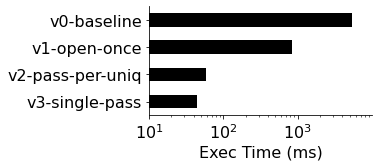

In [16]:
# Q11: How long does each version take for 5000-word inputs consisting of 100 unique words?
draw_version(100, 5000)

<AxesSubplot:xlabel='Exec Time (ms)'>

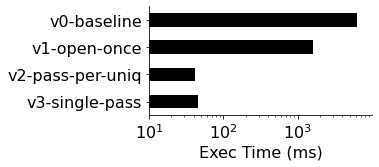

In [17]:
# Q12: How long does each version take for 5000-word inputs consisting of 1 unique words?
draw_version(1, 5000)

To get full points, write a short comment here with a hypothesis about when the v3 version does better than the v2 version.
- V3 version does better than v2 version when the unique words are large.

In [18]:
total = [1000, 2000, 5000, 10000]
percent = [10, 5, 1]
def tp_df(ver):
    df = DataFrame()
    for i in percent:
        col = []
        for j in total:
            uniq = int(0.01 * i * j)
            col.append(time_run_sec(uniq, j, commit = versions[ver])/1000)
        df[i] = col
    df.index = total
    return df

Text(0, 0.5, 'Time(s)')

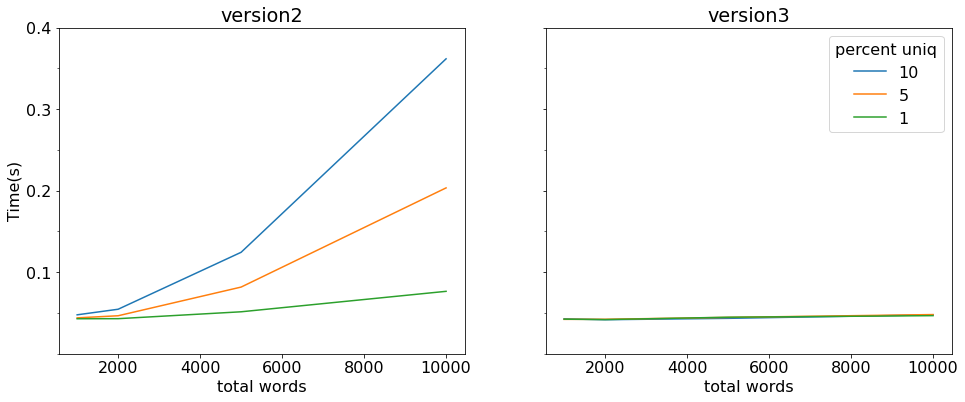

In [19]:
df1 = tp_df("v2-pass-per-uniq")
df2 = tp_df("v3-single-pass")
    
# Q13 [PLOT]: How does the number of total words and unique percent affect the performance of versions 2 and 3?
figure, axes = plt.subplots(1, 2, sharey=True)
y = [0.1, 0.2, 0.3, 0.4]
line1 = df1.plot(ax=axes[0], legend=None, title='version2', fontsize=16, figsize=(16, 6))
line2 = df2.plot(ax=axes[1], title='version3', figsize=(16, 6))
line1.set_ylim([0, 0.4])
plt.yticks(y)
plt.legend(title="percent uniq")
line1.set_xlabel("total words")
line1.set_ylabel("Time(s)")
line2.set_xlabel("total words", fontsize=16)
line2.set_ylabel("Time(s)")

In [20]:
class Commit:
    def __init__(self, commit_hex, author, message):
        self.commit_hex = commit_hex
        self.author = author
        self.message = message
    def __str__(self):
        sstr = self.commit_hex+"["+self.author+"]"+": "+self.message
        return sstr
class Repo:
    def __init__(self):
        self.rlist = []
    def commit(self, commit_hex, author, message):
        cmt = Commit(commit_hex, author, message)
        self.rlist.append(cmt)
        return cmt
    def __getitem__ (self, idx):
        if type(idx) == int:
            return self.rlist[idx]
        if type(idx) == str:
            idx = idx.upper()
            idx = idx.replace(" ", "")
            for r in self.rlist:
                if r.commit_hex == idx:
                    return str(r)
repo = Repo()
c1 = repo.commit("A39DE2", "Aarushi", "created the repo")
c2 = repo.commit("D1E9C5", "Ben", "wrote some code")
c3 = repo.commit("AA0912", "Emma", "added a readme")
c4 = repo.commit("B143D0", "Hunter", "made some tests")
c5 = repo.commit("F0148D", "Jaime", "fixed a bug")
c6 = repo.commit("B978EE", "Wendy", "optimized the code")

In [21]:
# Q14: what does running the following in a cell produce?
c1.commit_hex, c2.author, c3.message, c4.commit_hex, c5.author, c6.message

('A39DE2', 'Ben', 'added a readme', 'B143D0', 'Jaime', 'optimized the code')

In [22]:
# Q15: what does running the following in a cell produce?
str(c1), str(repo[1]), str(repo[-1])

('A39DE2[Aarushi]: created the repo',
 'D1E9C5[Ben]: wrote some code',
 'B978EE[Wendy]: optimized the code')

In [23]:
# Q16: what does running the following in a cell produce?
str(repo["F0148D"]), str(repo["b143d0"]), str(repo["  AA0912  "])

('F0148D[Jaime]: fixed a bug',
 'B143D0[Hunter]: made some tests',
 'AA0912[Emma]: added a readme')